In [1]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
epsilon_0 = 8.8541878170e-12
epsilon = 1.9*epsilon_0
sigma = 3.2e-3
a = 11
b = 5
c = 5
d = 3
g = 4
h = 1
scale = 60
L = 100
it = 0

In [3]:
# Potentials
data = np.zeros((b*scale,a*scale))

# Central square can be assumed to have constant potential
for i in range(c*scale):
    data[int(b-d-h)*scale:int(b-h)*scale,g*scale + i ] = np.ones(d*scale)

data = 100*data

In [15]:
def num_update(u):
    u[1:-1,1:-1] = (u[1:-1,:-2] + u[:-2,1:-1] + u[1:-1,2:] + u[2:,1:-1])*0.25

itermax = 300000
for i in tqdm(range(itermax)):
    num_update(data[0:int(b-d-h)*scale+1,:])
    num_update(data[int(b-d-h)*scale-1:int(b-h)*scale+1,:g*scale + 1])
    num_update(data[int(b-d-h)*scale-1:int(b-h)*scale+1,(g+c)*scale-1:])
    num_update(data[int(b-h)*scale-1:,:])
it += itermax
    
print("done")

100%|██████████| 300000/300000 [06:28<00:00, 771.91it/s]

done


In [16]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Contour Plot of Potential
y = np.linspace(0, b, b*scale)
x = np.linspace(0, a, a*scale)
ax1.contour(x,y, data, np.arange(0,100,10))

In [17]:
# Electric Field Components
E_x = np.copy(data)
E_y = np.copy(data)
delta = 1e-2/(scale)
for i in range(0,b*scale-1):
    for j in range(0,a*scale-1):
        E_y[i,j] = data[i,j] - data[i+1,j]
        E_x[i,j] = data[i,j] - data[i,j+1]
E_x /= delta
E_y /= delta

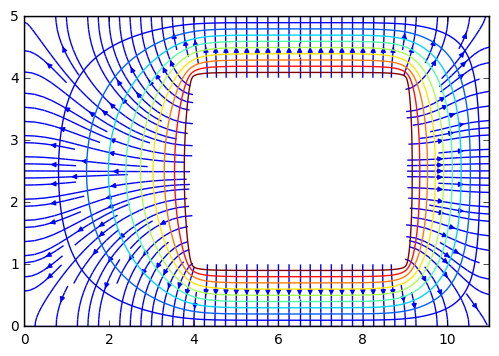

In [18]:
# Streamlines (Current lines)
ax2 = fig.add_subplot(111)
ax2.streamplot(x,y,sigma*E_x,sigma*E_y, density=1.5)
plt.show()

In [19]:
# Current
I = np.sum(data[:,1]) + np.sum(data[:,-2]) + np.sum(data[1,:]) + np.sum(data[-2,:])
I = sigma*L*1e-2*I

In [20]:
R = 100/I

In [21]:
C = epsilon/R/sigma

In [22]:
# Min Surface Charge Density
rho_s = 0
rho_s = max([rho_s, max(abs(E_y[0,:]))])
rho_s = max([rho_s, max(abs(E_y[-2,:]))])
rho_s = max([rho_s, max(abs(E_x[:,0]))])
rho_s = max([rho_s, max(abs(E_x[:,-2]))])
rho_s = epsilon * rho_s

In [23]:
I, R, C, rho_s

(4.855865179669502,
 20.593652480031615,
 2.5528128249426877e-10,
 1.6818940331013069e-07)

In [24]:
sigma_dual = 3e-3
L_dual = L
R_dual = 1/(2*R*sigma*sigma_dual*L*1e-2*L_dual*1e-2)

In [25]:
R_dual

2529.0964477445323